Based on the data it appears there is a correlation between weight of the mouse and final tumor size. 

The mean tumor volume for Ramicane and Capomulin are lower than the rest of the drugs. 

Ramicane and Capomulin both have the smallest standard deviation at just under 5 compared to the others which are in the 6-8 range. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
grouped_data = merge_table.groupby(['Drug Regimen'])
grouped_data

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen
mean_numpy = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
print(f"The mean tumor volume is {mean_numpy}")

median_numpy = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
print(f"The median tumor volume is {median_numpy}")

var_numpy = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
print(f"The variance using the NumPy module is {var_numpy}")

sd_numpy = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
print(f"The standard deviation using the NumPy module is {sd_numpy}")

sem_numpy = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
print(f"The SEM value for the tumor volume is {sem_numpy}")

The mean tumor volume is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median tumor volume is Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
The variance using the NumPy module is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
The standard deviation using the NumPy module is Drug Reg

In [4]:
summary_table = pd.DataFrame({"Mean":[mean_numpy], "Median":[median_numpy], "Variance":[var_numpy], "Standard Deviation":[sd_numpy], "SEM":[sem_numpy]})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = grouped_data["Drug Regimen"].count()
data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [6]:
x_axis = merge_table["Drug Regimen"].unique()
x_axis.sort()
x_axis

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

([<matplotlib.axis.XTick at 0x1f467c3dd30>,
 <a list of 10 Text xticklabel objects>)

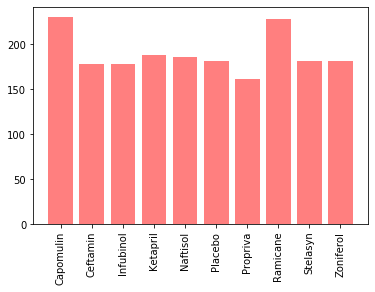

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, data_points, color='r', alpha=0.5, align="center")
plt.xticks(x_axis, rotation="vertical")

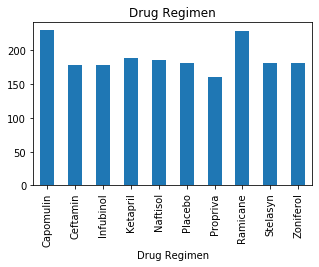

<Figure size 432x288 with 0 Axes>

In [8]:
# Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Drug Regimen")

plt.show()
plt.tight_layout()

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merge_table.groupby("Sex")
gender_count = gender.count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [10]:
total = merge_table["Sex"].count()
total

1893

In [11]:
male_female = gender_count["Mouse ID"]
male_female

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [12]:
percent = round(male_female / total * 100, 2)
percent

Sex
Female    49.39
Male      50.61
Name: Mouse ID, dtype: float64

(-1.1045772227072939,
 1.1002179629860616,
 -1.1027235251020564,
 1.1051930191148365)

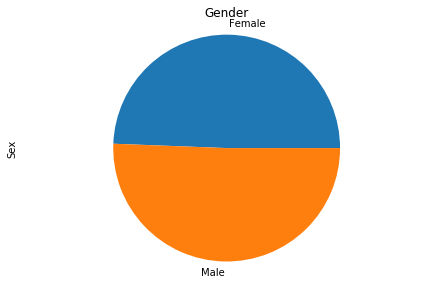

In [13]:
# Create a pie chart based upon the trip duration of that single bike
gender_pie = percent.plot(kind="pie", y=percent, title=("Gender"))
gender_pie.set_ylabel("Sex")

#plt.show()
plt.tight_layout()
plt.axis("equal")

([<matplotlib.patches.Wedge at 0x1f467d7d780>,
 [Text(-0.7230838324439438, -0.8289449748072419, 'Female'),
  Text(0.7230838324439443, 0.8289449748072414, 'Male')],
 [Text(-0.39440936315124203, -0.4521518044403137, '49.4%'),
  Text(0.39440936315124225, 0.45215180444031344, '50.6%')])

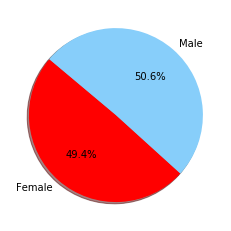

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = percent
colors = ["red", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [15]:
max_mouse = merge_table.groupby(["Mouse ID"])
max_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [16]:
mouse_max = max_mouse.max()

In [17]:
mouse_max.reset_index()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
top = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [19]:
top_drugs = mouse_max[mouse_max["Drug Regimen"].isin(top)]
top_drugs
new = top_drugs.reset_index()

In [20]:
df = new[["Drug Regimen", "Tumor Volume (mm3)"]]
df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,45.466677
4,Ramicane,45.000000
...,...,...
95,Ceftamin,68.594745
96,Capomulin,45.000000
97,Ceftamin,64.729837
98,Ramicane,45.000000


In [21]:
capomulin = df.loc[(df["Drug Regimen"] == "Capomulin")]
capomulin.set_index("Drug Regimen")

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.651331
Capomulin,45.000000
Capomulin,45.000000
Capomulin,46.304003
Capomulin,46.809225
Capomulin,47.685963
Capomulin,45.595685
Capomulin,48.158209
Capomulin,46.408361


In [22]:
ramicane = df.loc[(df["Drug Regimen"] == "Ramicane")]
ramicane.set_index("Drug Regimen")

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,45.466677
Ramicane,45.000000
Ramicane,45.000000
Ramicane,46.910892
Ramicane,45.722279
Ramicane,46.940945
Ramicane,45.000000
Ramicane,46.409084
Ramicane,45.851531


In [23]:
infubinol = df.loc[(df["Drug Regimen"] == "Infubinol")]
infubinol.set_index("Drug Regimen")

,Tumor Volume (mm3)
Drug Regimen,
Infubinol,67.973419
Infubinol,65.525743
Infubinol,57.031862
Infubinol,66.083066
Infubinol,72.226731
Infubinol,45.000000
Infubinol,60.969711
Infubinol,62.435404
Infubinol,60.918767


In [24]:
ceftamin = df.loc[(df["Drug Regimen"] == "Ceftamin")]
ceftamin.set_index("Drug Regimen")

,Tumor Volume (mm3)
Drug Regimen,
Ceftamin,62.999356
Ceftamin,45.000000
Ceftamin,56.057749
Ceftamin,55.742829
Ceftamin,48.722078
Ceftamin,47.784682
Ceftamin,61.849023
Ceftamin,68.923185
Ceftamin,67.748662


In [25]:
quartiles = capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin is: 45.0
The upper quartile of capomulin is: 46.74900552
The interquartile range of capomulin is: 1.7490055199999972
The the median of capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [26]:
quartiles = ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane is: 45.0
The upper quartile of ramicane is: 46.34383237
The interquartile range of ramicane is: 1.3438323700000012
The the median of ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [27]:
quartiles = infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The the median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The the median of infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [28]:
quartiles = ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The the median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin is: 48.72207785
The upper quartile of ceftamin is: 64.29983003
The interquartile range of ceftamin is: 15.577752179999997
The the median of ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


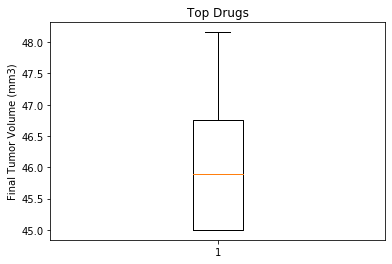

In [29]:
fig1, ax1 = plt.subplots()
plt.style.use("default")
ax1.set_title('Top Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin["Tumor Volume (mm3)"])
plt.show()

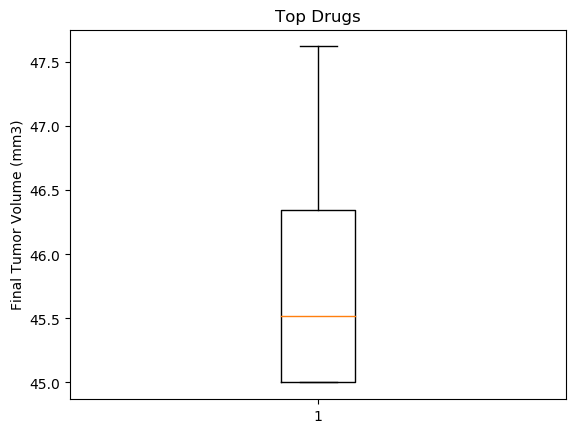

In [30]:
fig1, ax1 = plt.subplots()
ax1.set_title('Top Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane["Tumor Volume (mm3)"])
plt.show()

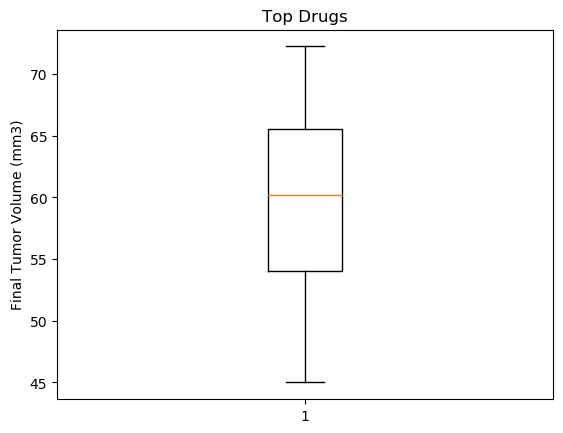

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_title('Top Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infubinol["Tumor Volume (mm3)"])
plt.show()

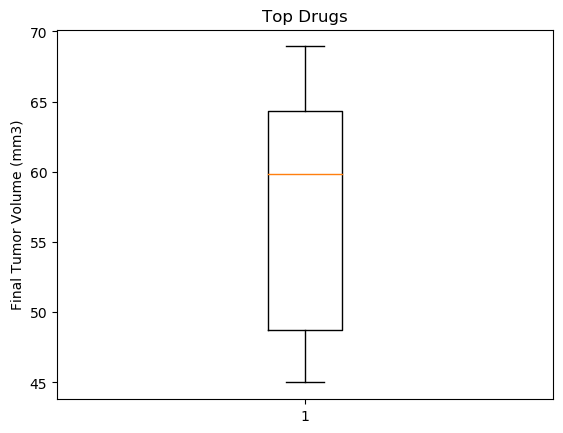

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Top Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin["Tumor Volume (mm3)"])
plt.show()

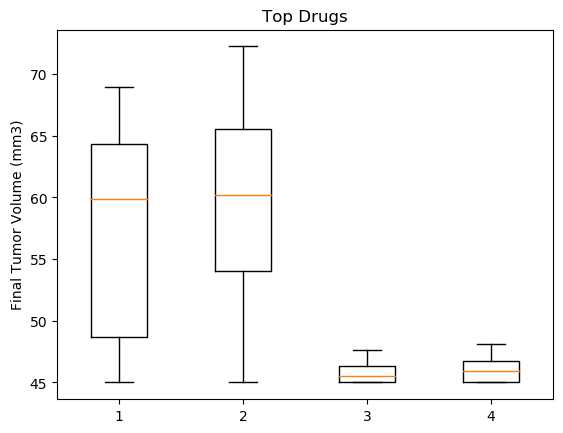

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Top Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot((ceftamin["Tumor Volume (mm3)"], infubinol["Tumor Volume (mm3)"], ramicane["Tumor Volume (mm3)"], capomulin["Tumor Volume (mm3)"]))
plt.show()

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse = merge_table.loc[(merge_table["Mouse ID"] == "s185")]
one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [35]:
reset_one = one_mouse.set_index("Timepoint")
reset_one

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,s185,Capomulin,Female,3,17,45.000000,0
5,s185,Capomulin,Female,3,17,43.878496,0
10,s185,Capomulin,Female,3,17,37.614948,0
15,s185,Capomulin,Female,3,17,38.177232,0
20,s185,Capomulin,Female,3,17,36.866876,0
25,s185,Capomulin,Female,3,17,33.949940,0
30,s185,Capomulin,Female,3,17,32.959671,1
35,s185,Capomulin,Female,3,17,28.328531,1
40,s185,Capomulin,Female,3,17,25.472143,1


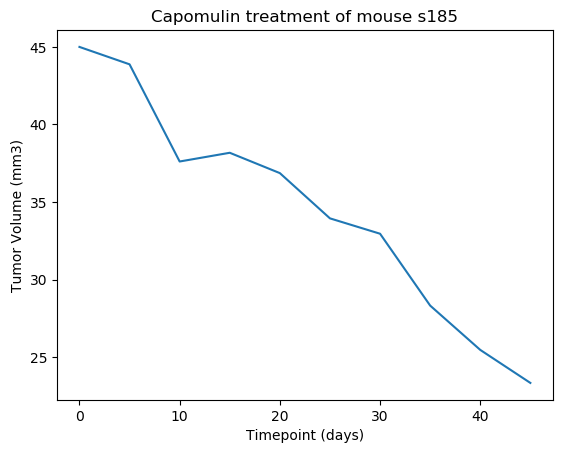

In [36]:
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")

plt.plot(reset_one["Tumor Volume (mm3)"])
plt.show()

In [37]:
cap = merge_table.loc[(merge_table["Drug Regimen"] == "Capomulin")]
cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [38]:
group = cap.groupby(["Mouse ID"])

In [39]:
max_mous = group.max()
max_mous

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2
b742,Capomulin,Male,7,21,45,45.000000,0
f966,Capomulin,Male,16,17,20,45.000000,0
g288,Capomulin,Male,3,19,45,46.304003,1
g316,Capomulin,Female,22,22,45,46.809225,2
i557,Capomulin,Female,1,24,45,47.685963,1
i738,Capomulin,Female,23,20,45,45.595685,2
j119,Capomulin,Female,7,23,45,48.158209,1
j246,Capomulin,Female,21,21,35,46.408361,1


In [40]:
average = group["Tumor Volume (mm3)"].mean()
average

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [41]:
scatter = cap[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"]]
scatter

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Weight (g)
10,s185,Capomulin,45.000000,17
11,s185,Capomulin,43.878496,17
12,s185,Capomulin,37.614948,17
13,s185,Capomulin,38.177232,17
14,s185,Capomulin,36.866876,17
...,...,...,...,...
440,i557,Capomulin,47.685963,24
1452,r157,Capomulin,45.000000,25
1453,r157,Capomulin,45.597064,25
1454,r157,Capomulin,46.059608,25


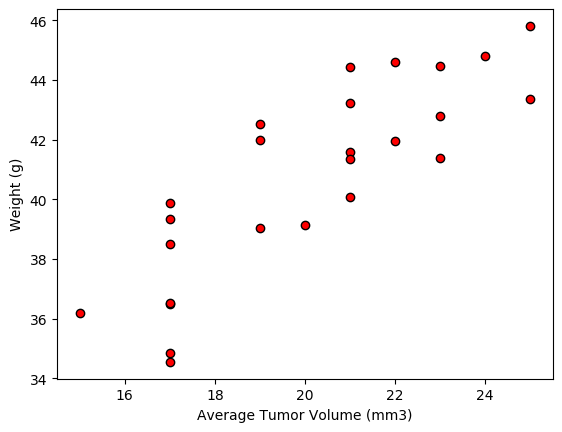

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.scatter(max_mous["Weight (g)"], average, marker="o", facecolors="red", edgecolors="black")

In [43]:
# Add the linear regression equation and line to plot
x_values = max_mous["Weight (g)"]
y_values = average

In [44]:
x = max_mous["Weight (g)"].values.reshape(-1,1)
y = average.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 21.552 + 0.95444X


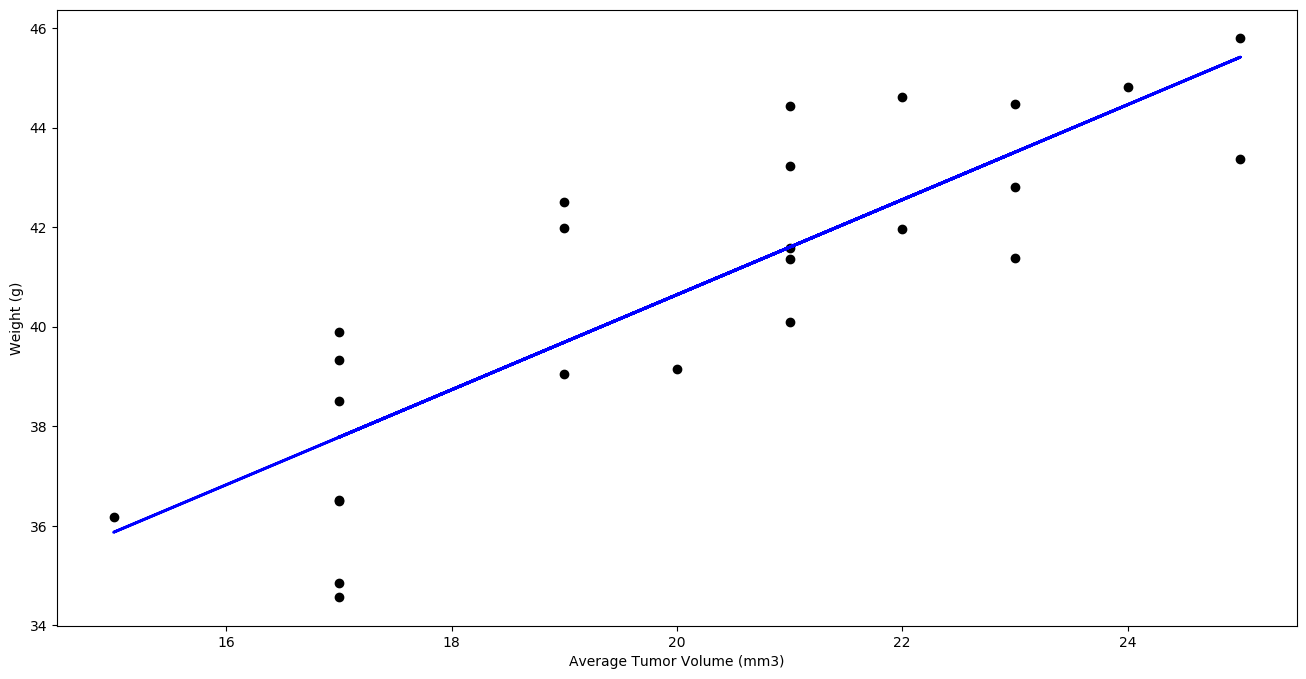

In [45]:
predictions = reg.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    x_values,
    y_values,
    c='black')
plt.plot(
    x_values,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()